Prob: 6
Geometry: 0


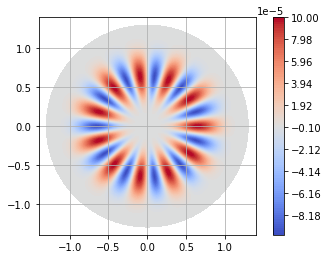

Geometry: 1


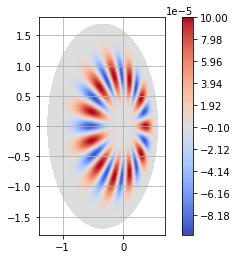

Geometry: 2


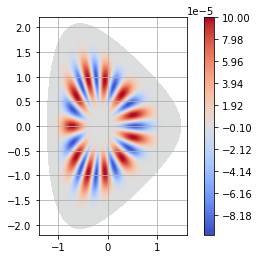

Prob: 7
Geometry: 0


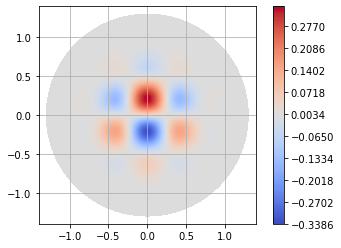

Geometry: 1


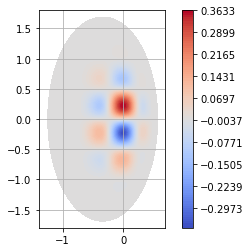

Geometry: 2


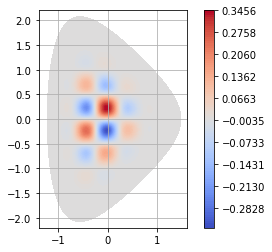

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

# Define the curvilinear mapping
def xymap(r, t, mod_pk=1, par1=0.3, par2=0.2, x0=0, y0=0):
    if mod_pk == 0:
        x = r*np.cos(t)
        y = r*np.sin(t)
    elif mod_pk == 1:
        kappa=par1
        delta=par2
        x = x0 + (1-kappa)*r*np.cos(t)-delta*r*r
        y = y0 + (1+kappa)*r*np.sin(t)
    elif mod_pk == 2:
        epsilon=par1
        lambdaa=par2
        sq = np.sqrt(1+epsilon*(epsilon+2*r*np.cos(t)))
        ksi = 1/np.sqrt(1-epsilon*epsilon/4)
        x = (1/epsilon)*(1-sq)
        y = y0 + lambdaa*ksi*r*np.sin(t)/(2-sq)
    return x, y

# Define the 2D function
def func(r, t, x, y, prob=6, mod_pk=1, C=1, Rmax=1, m=1):
    if prob==6:
        f=C*np.power(r/Rmax, 6)*np.power(r/Rmax-1, 6)*np.cos(m*t)
    elif prob==7:
        f=C*np.power(1+r/Rmax, 6)*np.power(1-r/Rmax, 6)*np.cos(2*np.pi*x)*np.sin(2*np.pi*y)
    return f

# Format numbers in scientific format
def fmt(x, pos):
    # a, b = '{:.2e}'.format(x).split('e')
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

PROB=6
MOD_PK=1
C = 2**12 * 10**(-4)
M = 11
RMIN = 1e-5
RMAX = 1.3
KAPPA=0.3
DELTA=0.2
EPSILON=0.3
LAMBDA=1.4

# Generate x and y values
N_INT = 1000
r = np.linspace(RMIN, RMAX, N_INT)
t = np.linspace(0, 2*np.pi, N_INT)

# Create a meshgrid from x and y
R, T = np.meshgrid(r, t)

for PROB in [6, 7]:
    print("Prob:",PROB)
    for MOD_PK in [0,1,2]:
        print("Geometry:",MOD_PK)
        if MOD_PK == 1:
            par1=KAPPA
            par2=DELTA
        elif MOD_PK == 2:
            par1=EPSILON
            par2=LAMBDA
        
        # Evaluate the function values for each point in the meshgrid
        X, Y = xymap(R, T, mod_pk=MOD_PK, par1=par1, par2=par2)
        Z = func(R, T, X, Y, prob=PROB, mod_pk=MOD_PK, C=C, Rmax=RMAX, m=M)
        # print("X:",np.min(X),np.max(X))
        # print("Y:",np.min(Y),np.max(Y))
        # print("Z:",np.min(Z),np.max(Z))

        # Plot the 2D function with logarithmic color scale
        plt.contourf(X, Y, Z, cmap='coolwarm',levels=np.linspace(Z.min(),Z.max(),100))

        # Set limits on the x and y axes
        if MOD_PK == 0:
            plt.xlim(-1.4, 1.4)
            plt.ylim(-1.4, 1.4)
        elif MOD_PK == 1:
            plt.xlim(-1.4, 0.7)
            plt.ylim(-1.8, 1.8)
        elif MOD_PK == 2:
            plt.xlim(-1.4, 1.6)
            plt.ylim(-2.2, 2.2)

        # Add colorbar
        cbar = plt.colorbar() #format=ticker.FuncFormatter(fmt))
        # format=ticker.ScalarFormatter()
        # cbar.set_label('Solution')

        # Set equal aspect ratio for the plot
        plt.gca().set_aspect('equal', adjustable='box')

        # Add labels and title
        # plt.xlabel('X-axis')
        # plt.ylabel('Y-axis')
        # plt.title('2D Function with Logarithmic Color Scale')
        
        plt.grid()
        
        # Save figure
        plt.savefig('sol_prob-'+str(PROB)+'_geom-'+str(MOD_PK)+'.png', bbox_inches='tight')

        # Show the plot
        plt.show()

ALPHA: 0.36788396183025623 2.718281828455285
BETA: 0.3678794411719512 2.718248425467935


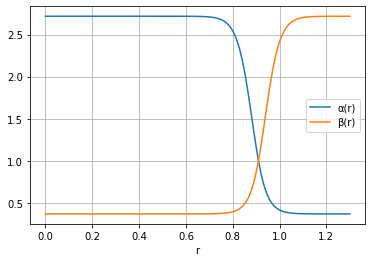

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 1D functions
def alpha(r, Rmax=1.3, rp=0.7, deltar=0.05):
    return np.exp(-np.tanh(((r/Rmax)-rp)/deltar))

def beta(r, Rmax=1.3, rp=0.7, deltar=0.05):
    return 1/alpha(r, Rmax=Rmax, rp=rp, deltar=deltar)

RMIN=1e-5
RMAX=1.3
RP=0.7
DELTAR=0.05

# Generate x values
r = np.linspace(RMIN, RMAX, 100)

# Evaluate the function values
alpha_r = alpha(r, Rmax=RMAX, rp=RP, deltar=DELTAR)
beta_r = beta(r, Rmax=RMAX, rp=RP, deltar=DELTAR)
print("ALPHA:",np.min(alpha_r),np.max(alpha_r))
print("BETA:",np.min(beta_r),np.max(beta_r))

# Plot the functions on the same plot
plt.plot(r, alpha_r, label='α(r)')
plt.plot(r, beta_r, label='β(r)')

# Add labels and title
plt.xlabel('r')
# plt.ylabel('')
# plt.title('Plotting Two 1D Functions')

# Add a legend
plt.legend()
        
plt.grid()

# Save figure
plt.savefig('coeff.png', bbox_inches='tight')

# Show the plot
plt.show()

In [14]:
def flops_comp(nr, nt, m_c, it, mod_pk):
    m = nr*nt
    mu_c = m_c/m
    # print("m",m,"m_c",m_c,"mu_c",mu_c)
    v1=1
    v2=1
    
    # GLOBAL
    if mod_pk == 0:
        flops_DF = 6
    elif mod_pk == 1:
        flops_DF = 18
    elif mod_pk == 2:
        flops_DF = 112

    # SETUP
    ## Flops
    flops_setup_smoother_m = 2*flops_DF + 70 + 7*mu_c
    flops_setup_m = 4/3*flops_setup_smoother_m
    # print("flops_setup_m",flops_setup_m)
    
    flops_setup = flops_setup_m * m
    ## Mem
    mem_setup_m = 3 + 2*mu_c
    # print("mem_setup_m",mem_setup_m)
    
    mem_setup = mem_setup_m * m
    
    # MG
    ## Flops
    flops_smoother_m = 2*flops_DF + 80 + 4*mu_c
    flops_residual_m = flops_DF + 107.25
    flops_m = (4*it)*((v1+v2)*flops_smoother_m + flops_residual_m)/3
    # print("flops_m",flops_m)
    
    flops = flops_m * m
    ## Mem
    mem_smoother_m = 2
    mem_residual_m = 3
    mem_m = 4*(mem_smoother_m + mem_residual_m)/3
    # print("mem_m",mem_m)
    
    mem = mem_m * m
    
    return flops_setup, mem_setup, flops, mem
    
    
MOD_PK=1
nr = [769, 1537, 3073, 6145]
nt = [1024, 2048, 4096, 8192]
m_c = [161, 321, 641, 1281]
it = [70, 67, 64, 61]
for MOD_PK in [0, 1, 2]:
    print("MOD_PK: ",MOD_PK)
    print("nr,nt,m,m_c,it,flops_setup,mem_setup,flops,mem")
    for i in range(len(nr)):
        flops_setup, mem_setup, flops, mem = flops_comp(nr[i], nt[i], m_c[i], it[i], MOD_PK)
        print(nr[i],",",nt[i],",","{:.2e}".format(nr[i]*nt[i]),",",m_c[i],",",it[i],",","{:.2e}".format(flops_setup),",","{:.2e}".format(mem_setup),",","{:.2e}".format(flops),",","{:.2e}".format(mem))
    print("\n")

MOD_PK:  0
nr,nt,m,m_c,it,flops_setup,mem_setup,flops,mem
769 , 1024 , 7.87e+05 , 161 , 70 , 8.61e+07 , 2.36e+06 , 2.18e+10 , 5.25e+06
1537 , 2048 , 3.15e+06 , 321 , 67 , 3.44e+08 , 9.44e+06 , 8.36e+10 , 2.10e+07
3073 , 4096 , 1.26e+07 , 641 , 64 , 1.38e+09 , 3.78e+07 , 3.19e+11 , 8.39e+07
6145 , 8192 , 5.03e+07 , 1281 , 61 , 5.50e+09 , 1.51e+08 , 1.22e+12 , 3.36e+08


MOD_PK:  1
nr,nt,m,m_c,it,flops_setup,mem_setup,flops,mem
769 , 1024 , 7.87e+05 , 161 , 70 , 1.11e+08 , 2.36e+06 , 2.63e+10 , 5.25e+06
1537 , 2048 , 3.15e+06 , 321 , 67 , 4.45e+08 , 9.44e+06 , 1.00e+11 , 2.10e+07
3073 , 4096 , 1.26e+07 , 641 , 64 , 1.78e+09 , 3.78e+07 , 3.84e+11 , 8.39e+07
6145 , 8192 , 5.03e+07 , 1281 , 61 , 7.11e+09 , 1.51e+08 , 1.46e+12 , 3.36e+08


MOD_PK:  2
nr,nt,m,m_c,it,flops_setup,mem_setup,flops,mem
769 , 1024 , 7.87e+05 , 161 , 70 , 3.09e+08 , 2.36e+06 , 6.08e+10 , 5.25e+06
1537 , 2048 , 3.15e+06 , 321 , 67 , 1.23e+09 , 9.44e+06 , 2.33e+11 , 2.10e+07
3073 , 4096 , 1.26e+07 , 641 , 64 , 4.93e+0